In [63]:
import io
import requests
import json
import http.client

import pandas as pd

import altair as alt
#magic

%matplotlib inline

This is the code from the site

In [45]:
conn = http.client.HTTPSConnection("api.resourcewatch.org")

conn.request("GET", "/v1/query/8027f9dc-8531-46d7-bd3c-e48393c14dc3?sql=SELECT%20*%20FROM%20index_8027f9dc853146d7bd3ce48393c14dc3")

res = conn.getresponse()
data = res.read()

{"data":[{"1960":0,"1961":0,"1962":0,"1963":0,"1964":0,"1965":0,"1966":0,"1967":0,"1968":0,"1969":0,"1970":0,"1971":0,"1972":0,"1973":0,"1974":0,"1975":0,"1976":0,"1977":0,"1978":0,"1979":0,"1980":0,"1981":0,"1982":0,"1983":0,"1984":0,"1985":0,"1986":0,"1987":0,"1988":0,"1989":0,"1990":13.4,"1991":13.2,"1992":13,"1993":12.9,"1994":12.9,"1995":12.7,"1996":12.5,"1997":12.3,"1998":11.9,"1999":11.7,"2000":11.3,"2001":11,"2002":10.7,"2003":10.3,"2004":9.8,"2005":9.4,"2006":8.9,"2007":8.5,"2008":8.2,"2009":7.9,"2010":7.5,"2011":7.2,"2012":7,"2013":6.8,"2014":6.5,"2015":6.2,"2016":0,"Country_Name":"Albania","Country_Code":"ALB","Indicator_Name":"Mortality rate, neonatal (per 1,000 live births)","Indicator_Code":"SH.DYN.NMRT","_id":"AVmXqRaOGMS00IEWB7Xs"},{"1960":0,"1961":0,"1962":0,"1963":0,"1964":0,"1965":0,"1966":0,"1967":0,"1968":0,"1969":0,"1970":0,"1971":0,"1972":0,"1973":0,"1974":0,"1975":0,"1976":0,"1977":0,"1978":0,"1979":0,"1980":0,"1981":0,"1982":0,"1983":0,"1984":0,"1985":0,"1986":

I think this is neater

In [44]:
url = r"http://api.resourcewatch.org/v1/query/8027f9dc-8531-46d7-bd3c-e48393c14dc3?sql=SELECT%20*%20FROM%20index_8027f9dc853146d7bd3ce48393c14dc3"
response = requests.get(url)

js = response.json()

Get a dataframe out of this

In [49]:
df = pd.DataFrame(js["data"])

df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,Country_Code,Country_Name,Indicator_Code,Indicator_Name,_id
0,0,0,0,0,0,0,0,0,0,0,...,7.0,6.8,6.5,6.2,0,ALB,Albania,SH.DYN.NMRT,"Mortality rate, neonatal (per 1,000 live births)",AVmXqRaOGMS00IEWB7Xs
1,0,0,0,0,0,0,0,0,0,0,...,1.2,1.2,1.1,1.1,0,BHR,Bahrain,SH.DYN.NMRT,"Mortality rate, neonatal (per 1,000 live births)",AVmXqRaOGMS00IEWB7X8
2,0,0,0,0,0,0,0,0,0,0,...,40.2,39.4,38.6,37.9,0,CIV,Cote d'Ivoire,SH.DYN.NMRT,"Mortality rate, neonatal (per 1,000 live births)",AVmXqRaOGMS00IEWB7YP
3,0,0,0,0,0,0,0,0,0,0,...,6.5,6.4,6.3,6.2,0,CRI,Costa Rica,SH.DYN.NMRT,"Mortality rate, neonatal (per 1,000 live births)",AVmXqRaOGMS00IEWB7YV
4,0,0,0,0,0,0,0,0,0,0,...,35.9,35.2,34.2,33.4,0,DJI,Djibouti,SH.DYN.NMRT,"Mortality rate, neonatal (per 1,000 live births)",AVmXqRaOGMS00IEWB7Yd


Looks like we need to melt this to make it useable

In [53]:
year_cols =[col for col in df.columns.tolist() if col.isdigit()]

id_cols = set(df.columns.tolist()) - set(year_cols)

df_melt = df.melt(id_vars = id_cols,
                  value_vars = year_cols, 
                  var_name = "year",
                  value_name = "mortality"
                 )

df_melt.head()

,_id,Indicator_Code,Indicator_Name,Country_Code,Country_Name,year,mortality
0,AVmXqRaOGMS00IEWB7Xs,SH.DYN.NMRT,"Mortality rate, neonatal (per 1,000 live births)",ALB,Albania,1960,0.0
1,AVmXqRaOGMS00IEWB7X8,SH.DYN.NMRT,"Mortality rate, neonatal (per 1,000 live births)",BHR,Bahrain,1960,0.0
2,AVmXqRaOGMS00IEWB7YP,SH.DYN.NMRT,"Mortality rate, neonatal (per 1,000 live births)",CIV,Cote d'Ivoire,1960,0.0
3,AVmXqRaOGMS00IEWB7YV,SH.DYN.NMRT,"Mortality rate, neonatal (per 1,000 live births)",CRI,Costa Rica,1960,0.0
4,AVmXqRaOGMS00IEWB7Yd,SH.DYN.NMRT,"Mortality rate, neonatal (per 1,000 live births)",DJI,Djibouti,1960,0.0


In [66]:
df_melt.describe()

,mortality
count,12027.000000
mean,8.203678
std,13.794282
min,0.000000
25%,0.000000
50%,0.000000
75%,12.000929
max,73.100000


In [67]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12027 entries, 0 to 12026
Data columns (total 7 columns):
_id               12027 non-null object
Indicator_Code    12027 non-null object
Indicator_Name    12027 non-null object
Country_Code      12027 non-null object
Country_Name      12027 non-null object
year              12027 non-null object
mortality         12027 non-null float64
dtypes: float64(1), object(6)
memory usage: 657.8+ KB


now graph the data

first take a random subset

In [86]:
countries = pd.Series(df_melt["Country_Name"].unique()).sample(frac = 0.1, 
                                                                random_state = 42
                                                               ).tolist()
    
mask = (df_melt["Country_Name"].isin(countries)) & (df_melt["mortality"] > 0)

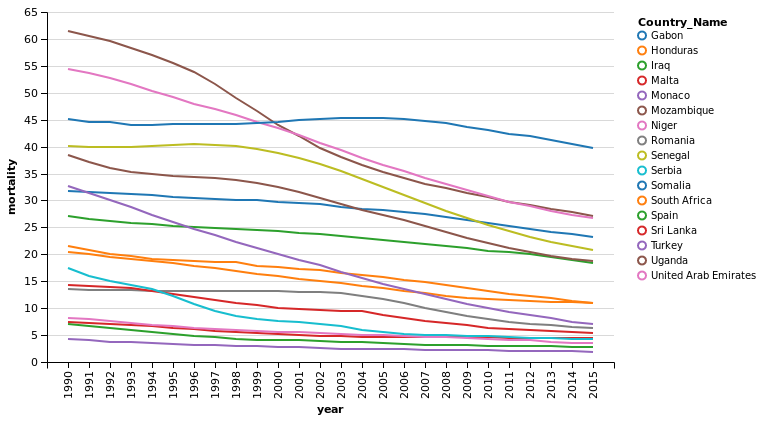

In [87]:
c = alt.Chart(df_melt[mask]).mark_line().encode( x = 'year',
                                          y='mortality',
                                          color='Country_Name'
                                         )
c